# Access data file

In [11]:
# Imports
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats


In [12]:
# Access data
raw_df = pd.read_csv("lung_cancer_data.csv")
raw_df.head()

,Patient_ID,Age,Gender,Smoking_History,Tumor_Size_mm,Tumor_Location,Stage,Treatment,Survival_Months,Ethnicity,...,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years
0,Patient0000,68,Male,Current Smoker,81.678677,Lower Lobe,Stage III,Surgery,44,Hispanic,...,27.985571,46.801214,1.245849,239.240255,10.366307,3.547734,113.919243,4.968163,139.822861,17.006956
1,Patient0001,58,Male,Never Smoked,78.448272,Lower Lobe,Stage I,Radiation Therapy,101,Caucasian,...,30.120956,39.711531,1.463231,233.515237,10.081731,2.945020,101.321578,3.896795,135.449361,93.270893
2,Patient0002,44,Male,Former Smoker,67.714305,Lower Lobe,Stage I,Chemotherapy,69,African American,...,5.882418,32.640602,0.630109,169.037460,8.660892,4.637399,78.214177,4.369050,143.377155,70.348376
3,Patient0003,72,Male,Current Smoker,70.806008,Lower Lobe,Stage III,Chemotherapy,95,African American,...,38.908154,44.319393,0.594342,213.967590,8.832669,3.617098,127.895361,4.348474,138.586005,19.828128
4,Patient0004,37,Female,Never Smoked,87.272433,Lower Lobe,Stage IV,Radiation Therapy,105,Asian,...,26.344877,15.746906,1.478239,118.187543,9.247609,4.773255,148.801185,3.671976,141.230724,81.047456


# Clean data

In [24]:
# Check for missing data
raw_df.count()

Patient_ID                          23658
Age                                 23658
Gender                              23658
Smoking_History                     23658
Tumor_Size_mm                       23658
Tumor_Location                      23658
Stage                               23658
Treatment                           23658
Survival_Months                     23658
Ethnicity                           23658
Insurance_Type                      23658
Family_History                      23658
Comorbidity_Diabetes                23658
Comorbidity_Hypertension            23658
Comorbidity_Heart_Disease           23658
Comorbidity_Chronic_Lung_Disease    23658
Comorbidity_Kidney_Disease          23658
Comorbidity_Autoimmune_Disease      23658
Comorbidity_Other                   23658
Performance_Status                  23658
Blood_Pressure_Systolic             23658
Blood_Pressure_Diastolic            23658
Blood_Pressure_Pulse                23658
Hemoglobin_Level                  

- No missing values. Did not need to .dropna()

In [14]:
raw_df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Smoking_History', 'Tumor_Size_mm',
       'Tumor_Location', 'Stage', 'Treatment', 'Survival_Months', 'Ethnicity',
       'Insurance_Type', 'Family_History', 'Comorbidity_Diabetes',
       'Comorbidity_Hypertension', 'Comorbidity_Heart_Disease',
       'Comorbidity_Chronic_Lung_Disease', 'Comorbidity_Kidney_Disease',
       'Comorbidity_Autoimmune_Disease', 'Comorbidity_Other',
       'Performance_Status', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Blood_Pressure_Pulse', 'Hemoglobin_Level',
       'White_Blood_Cell_Count', 'Platelet_Count', 'Albumin_Level',
       'Alkaline_Phosphatase_Level', 'Alanine_Aminotransferase_Level',
       'Aspartate_Aminotransferase_Level', 'Creatinine_Level', 'LDH_Level',
       'Calcium_Level', 'Phosphorus_Level', 'Glucose_Level', 'Potassium_Level',
       'Sodium_Level', 'Smoking_Pack_Years'],
      dtype='object')

In [15]:
cancer_df = raw_df[["Patient_ID", "Age", "Gender", "Ethnicity", "Family_History", "Smoking_History", "Smoking_Pack_Years", "Tumor_Size_mm", "Tumor_Location", "Stage", "Treatment", "Survival_Months"]]
cancer_df.head()

,Patient_ID,Age,Gender,Ethnicity,Family_History,Smoking_History,Smoking_Pack_Years,Tumor_Size_mm,Tumor_Location,Stage,Treatment,Survival_Months
0,Patient0000,68,Male,Hispanic,No,Current Smoker,17.006956,81.678677,Lower Lobe,Stage III,Surgery,44
1,Patient0001,58,Male,Caucasian,Yes,Never Smoked,93.270893,78.448272,Lower Lobe,Stage I,Radiation Therapy,101
2,Patient0002,44,Male,African American,Yes,Former Smoker,70.348376,67.714305,Lower Lobe,Stage I,Chemotherapy,69
3,Patient0003,72,Male,African American,Yes,Current Smoker,19.828128,70.806008,Lower Lobe,Stage III,Chemotherapy,95
4,Patient0004,37,Female,Asian,No,Never Smoked,81.047456,87.272433,Lower Lobe,Stage IV,Radiation Therapy,105


# Question 1
- Are there any demographics within the dataset that demonstrate higher risk of lung cancer?

In [16]:
# Age
cancer_df["Age"].describe()

count    23658.000000
mean        54.439344
std         14.396386
min         30.000000
25%         42.000000
50%         54.000000
75%         67.000000
max         79.000000
Name: Age, dtype: float64

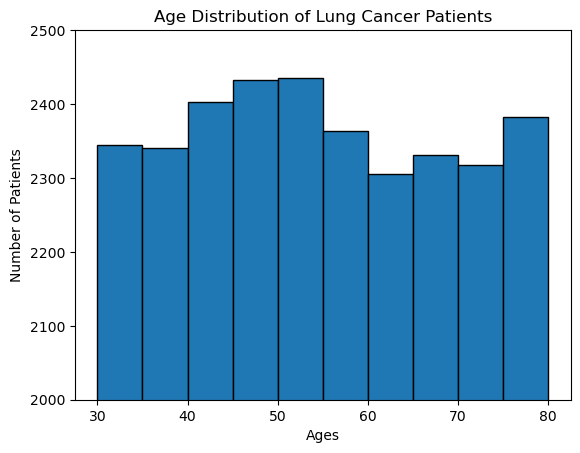

In [17]:
# Age plot
bins=[30,35,40,45,50,55,60,65,70,75,80]
plt.hist(cancer_df["Age"], bins=bins, edgecolor="black")
plt.title("Age Distribution of Lung Cancer Patients")
plt.ylabel("Number of Patients")
plt.ylim(2000, 2500)
plt.xlabel("Ages")

plt.savefig("Output/Age_Distribution_fig")

plt.show()

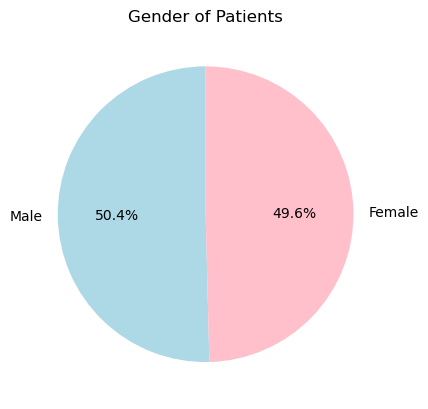

In [18]:
# Gender
genders = ["Male", "Female"]
colors = ["lightblue", "pink"]
gender_counts = cancer_df["Gender"].value_counts()

plt.pie(gender_counts, colors=colors, labels=genders, autopct="%1.1f%%", startangle=90)
plt.title("Gender of Patients")

plt.savefig("Output/Gender_Distribution_fig")

plt.show()

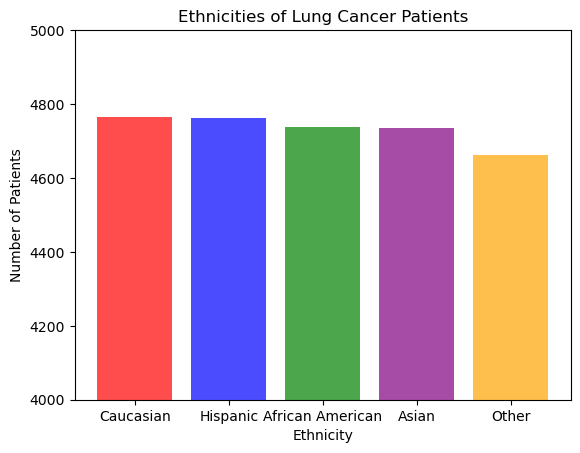

In [19]:
# Ethnicity
ethnicity_counts = cancer_df["Ethnicity"].value_counts()
ethnicity_x = ethnicity_counts.index
ethnicity_y = ethnicity_counts.values
colors = ["red", "blue", "green", "purple", "orange"]

plt.bar(ethnicity_x, ethnicity_y, color=colors, alpha=.70)
plt.title("Ethnicities of Lung Cancer Patients")
plt.ylim(4000, 5000)
plt.ylabel("Number of Patients")
plt.xlabel("Ethnicity")
plt.xticks()

plt.savefig("Output/Ethnicity_Distribution_fig")

plt.show()


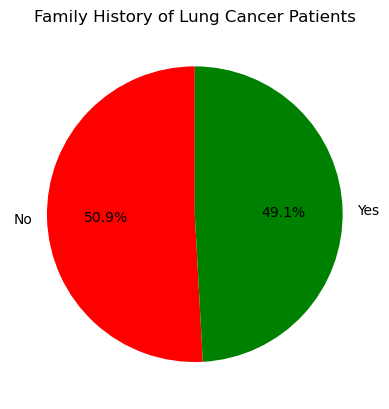

In [20]:
# Famliy History
family_history = cancer_df["Family_History"].value_counts()
histories = ["No", "Yes"]
colors = ["red", "green"]

plt.pie(family_history, colors=colors, labels=histories, autopct="%1.1f%%", startangle=90)
plt.title("Family History of Lung Cancer Patients")

plt.savefig("Output/Family_History_fig")

plt.show()

### Question 1 Analysis
- Ethnicity, Gender, and Famly History are close to even within their subgroups.
- Age is fairly evenly spread between 30 and 80 years with a small increase in frequency around the mean/median of 54 years.
- No one factor stands out as having a higher risk of cancer. This may be due to the synthetic nature of the dataset.

# Question 2
- What impact does smoking have on the onset of lung cancer?

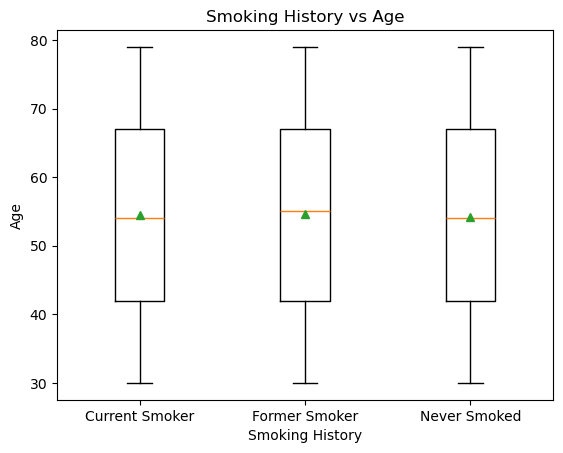

In [21]:
# Age vs Smoking History
current_vs_age = cancer_df.loc[(cancer_df["Smoking_History"] == "Current Smoker"), "Age"]
former_vs_age = cancer_df.loc[(cancer_df["Smoking_History"] == "Former Smoker"), "Age"]
never_vs_age = cancer_df.loc[(cancer_df["Smoking_History"] == "Never Smoked"), "Age"]

labels = ["Current Smoker", "Former Smoker", "Never Smoked"]

plt.boxplot([current_vs_age, former_vs_age, never_vs_age], labels=labels, showmeans=True)
plt.title("Smoking History vs Age")
plt.ylabel("Age")
plt.xlabel("Smoking History")

plt.savefig("Output/Smoking_History_vs_Age_fig")

plt.show()

In [22]:
print(f"Current smoker mean: {current_vs_age.mean()} median: {current_vs_age.median()} std dev: {current_vs_age.std()}")
print(f"Former smoker mean: {former_vs_age.mean()} median: {former_vs_age.median()} std dev: {former_vs_age.std()}")
print(f"Never smoked mean: {never_vs_age.mean()} median: {never_vs_age.median()} std dev: {never_vs_age.std()}")

Current smoker mean: 54.478903760356914 median: 54.0 std dev: 14.418057683868652
Former smoker mean: 54.63390847711928 median: 55.0 std dev: 14.433126088130697
Never smoked mean: 54.200511836212414 median: 54.0 std dev: 14.33529706687238


r^2 value: 1.9215548355196506e-06


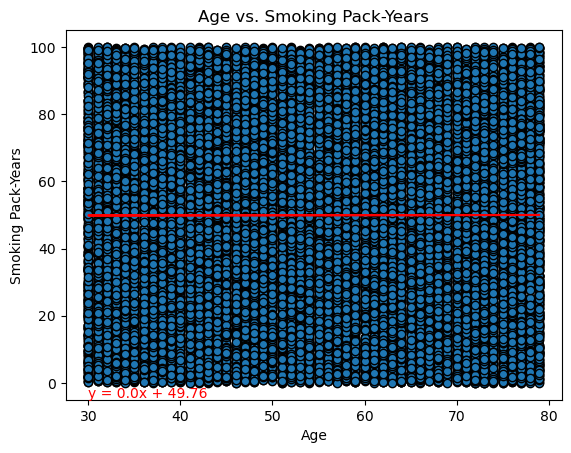

In [23]:
# Age vs Smoking Pack-Years
age_x = cancer_df["Age"].values
pack_years_y = cancer_df["Smoking_Pack_Years"].values

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(age_x, pack_years_y)
print(f"r^2 value: {rvalue**2}")

equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
line = slope * age_x + intercept

plt.scatter(age_x, pack_years_y, edgecolors="black")
plt.plot(age_x, line, color="red")
plt.annotate(equation, (30, -4.5), color="red")
plt.title("Age vs. Smoking Pack-Years")
plt.ylabel("Smoking Pack-Years")
plt.ylim(-5, 105)
plt.xlabel("Age")

plt.savefig("Output/Smoking_Pack-Years_vs_Age_fig")

plt.show()

### Question 2 Analysis
- Smoking history has nearly identical mean, median, and standard deviation of ages
- Smoking Pack-years and age have no correlation. Slope of linear regression and r^2 value are both effectively 0.
- Smoking has no impact on the onset of lung cancer in the dataset.

# Question 3

# Question 4

# Question 5

# Question 6

# Question 7
- Which treatment has a higher survival rate?
Compare efficacy of Chemotherapy, Surgery, radiation, target therapy

In [55]:
# Check treatment distribution by counts
cancer_df["Treatment"].value_counts()

Treatment
Radiation Therapy    5966
Surgery              5944
Chemotherapy         5936
Targeted Therapy     5812
Name: count, dtype: int64

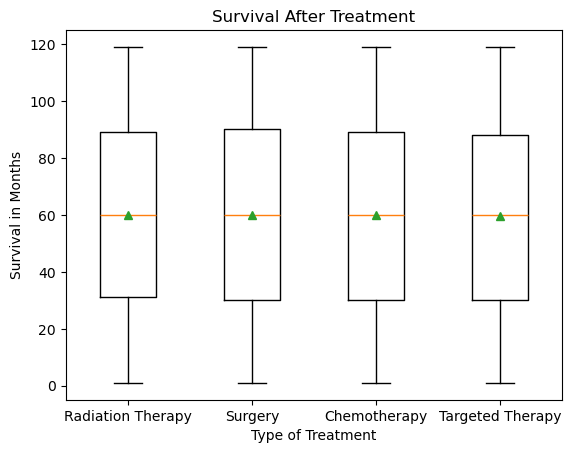

In [64]:
rad_survival = cancer_df.loc[cancer_df["Treatment"] == "Radiation Therapy", "Survival_Months"]
surg_survival = cancer_df.loc[cancer_df["Treatment"] == "Surgery", "Survival_Months"]
chemo_survival = cancer_df.loc[cancer_df["Treatment"] == "Chemotherapy", "Survival_Months"]
target_survival = cancer_df.loc[cancer_df["Treatment"] == "Targeted Therapy", "Survival_Months"]

labels = ["Radiation Therapy", "Surgery", "Chemotherapy", "Targeted Therapy"]

plt.boxplot([rad_survival, surg_survival, chemo_survival, target_survival], labels=labels, showmeans=True)
plt.title("Survival After Treatment")
plt.ylabel("Survival in Months")
plt.xlabel("Type of Treatment")

plt.savefig("Output/Survival_by_Treatment_fig")

plt.show()

In [63]:
print(f"Radiation therapy mean: {rad_survival.mean()} median: {rad_survival.median()} std dev:{rad_survival.std()}")
print(f"Surgery therapy mean: {surg_survival.mean()} median: {surg_survival.median()} std dev:{surg_survival.std()}")
print(f"Chemotherapy therapy mean: {chemo_survival.mean()} median: {chemo_survival.median()} std dev:{chemo_survival.std()}")
print(f"Targeted therapy mean: {target_survival.mean()} median: {target_survival.median()} std dev:{target_survival.std()}")

Radiation therapy mean: 60.09671471672812 median: 60.0 std dev:34.0017385177742
Surgery therapy mean: 59.914872139973085 median: 60.0 std dev:34.50553810237739
Chemotherapy therapy mean: 59.81974393530997 median: 60.0 std dev:34.388800135044306
Targeted therapy mean: 59.61751548520303 median: 60.0 std dev:34.090137174507916


### Question 7 Analysis:
- There is no difference in survival rates between types of treatments.
- Mean, median, standard deviations were all nearly identical between all treatments.

# Question 8
- Does smoking affect survival rate?
Smoking status (past, current, never smoked)and survival rate